<a href="https://colab.research.google.com/github/mafeacevedoo/Entrega-II/blob/main/Simulaci%C3%B3n_y_An%C3%A1lisis_de_Motores_de_Combusti%C3%B3n_Interna_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el radio del cigüeñal (cm): 5
Ingrese la longitud de la biela (cm): 15
Ingrese la excentricidad entre el centro del pistón y el centro del cigüeñal (cm): 3
Ingrese el diámetro del pistón (cm): 8
Ingrese el volumen de la cámara de combustión cuando el pistón está en el punto más alto (cm³): 500


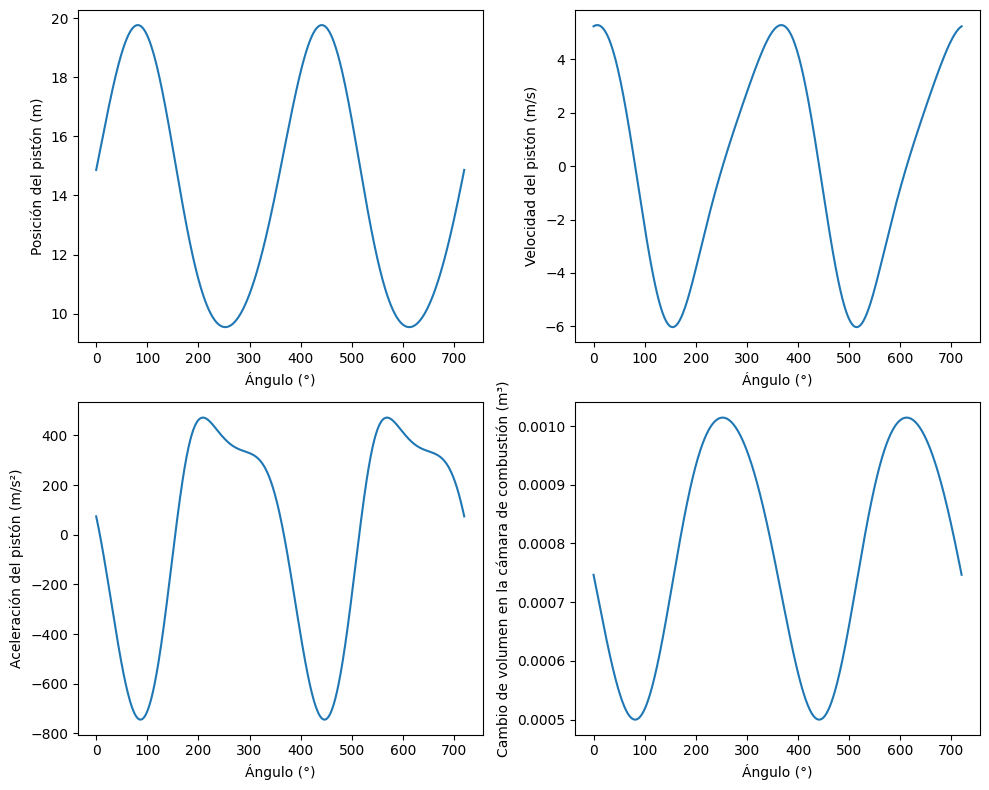

In [5]:
#Se importan las librerias necesarias
import math
import matplotlib.pyplot as plt

#Se definen los parámetros del motor que son ingresados por el usuario
r = float(input("Ingrese el radio del cigüeñal (cm): ")) / 100
l = float(input("Ingrese la longitud de la biela (cm): ")) / 100
e = float(input("Ingrese la excentricidad entre el centro del pistón y el centro del cigüeñal (cm): ")) / 100
d = float(input("Ingrese el diámetro del pistón (cm): ")) / 100
CC = float(input("Ingrese el volumen de la cámara de combustión cuando el pistón está en el punto más alto (cm³): ")) * (10**-6)

#Se realiza la conversión de rpm a rad/s
omega = 1000 * 2 * math.pi / 60
epsilon=0.001
epsilonrad = epsilon * math.pi / 180
deltat = epsilonrad/omega

#Se define la función posicionp(angulo) para calcular la posición del pistón para un ángulo dado
def posicionp(angulo) :
  s = r * (math.sin(angulo) + l / r * math.sqrt(1 - ((e - r *math.cos(angulo)) / l)**2))
  return s

#Se define la función velocidadp(angulo)para calcular la velocidad del pistón para un ángulo dado.
def velocidadp(angulo) :
  v = (posicionp(angulo + epsilonrad) - posicionp(angulo))/deltat
  return v

#Se define la función aceleraciónp(angulo) para calcular la aceleración del pistón para un ángulo dado
def aceleracionp(angulo) :
  a = (velocidadp(angulo + epsilonrad) - velocidadp(angulo))/deltat
  return a

#Se define la función volumencam(angulo)para calcular el volumen de la cámara de combustión para un ángulo dado
def volumencam(angulo) :
  s = posicionp(angulo)
  h = math.sqrt((r+l)**2-e**2)-s
  A = math.pi * (d/2)**2
  V = CC + A*h
  return V

#Se crean listas vacías para almacenar los valores de posición, velocidad, aceleración y volumen
posiciones = []
velocidades = []
aceleraciones = []
volcamara = []

#Se calculan los valores de posición, velocidad, aceleración y volumen para cada ángulo
for i in range(0, 721, 1):
  angulo = i * math.pi / 180
  s = (posicionp(angulo)) *100
  v = velocidadp(angulo)
  a = aceleracionp(angulo)
  V = volumencam(angulo)
  posiciones.append(s)
  velocidades.append(v)
  aceleraciones.append(a)
  volcamara.append(V)

# Se grafican los resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfica que define la posición del vector respecto al ángulo en un tiempo t:
axs[0, 0].plot([i for i in range(0, 721, 1)], posiciones)
axs[0, 0].set(xlabel="Ángulo (°)", ylabel="Posición del pistón (m)")

# Gráfica que define la velocidad del vector respecto al ángulo en un tiempo t:
axs[0, 1].plot([i for i in range(0, 721, 1)], velocidades)
axs[0, 1].set(xlabel="Ángulo (°)", ylabel="Velocidad del pistón (m/s)")

# Gráfica que define la aceleración del vector respecto al ángulo en un tiempo t:
axs[1, 0].plot([i for i in range(0, 721, 1)], aceleraciones)
axs[1, 0].set(xlabel="Ángulo (°)", ylabel="Aceleración del pistón (m/s²)")

# Gráfica que define cambio del volumen en la cámara respecto al ángulo cigueñal:
axs[1, 1].plot([i for i in range(0, 721, 1)], volcamara)
axs[1, 1].set(xlabel="Ángulo (°)", ylabel="Cambio de volumen en la cámara de combustión (m³)")

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

plt.show()
